In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:

dataset_url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv'
destination_file = 'Gemini_BTCEUR_d.csv'

response = requests.get(dataset_url)

if response.status_code == 200:
    with open(destination_file, 'wb') as file:
        file.write(response.content)
    print(f'Dataset downloaded successfully to {destination_file}')
else:
    print(f'Failed to download dataset. Status code: {response.status_code}')
    
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, skiprows=[0])
# Display the DataFrame


Dataset downloaded successfully to Gemini_BTCEUR_d.csv


In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,1714867200000,2024-05-05 00:00:00,BTC/EUR,59280.12,61999.99,58642.62,59429.85,0.011251,668.658911
1,1714780800000,2024-05-04 00:00:00,BTC/EUR,58550.01,59779.71,58483.62,59280.12,0.234535,13903.256423
2,1714694400000,2024-05-03 00:00:00,BTC/EUR,55202.52,59309.74,55116.10,58550.01,2.677121,156745.442000
3,1714608000000,2024-05-02 00:00:00,BTC/EUR,53655.68,55563.72,53569.97,55202.52,0.574484,31712.979956
4,1714521600000,2024-05-01 00:00:00,BTC/EUR,56390.86,57248.39,53157.30,53655.68,4.231182,227026.944731
...,...,...,...,...,...,...,...,...,...
1639,1603857600000,2020-10-28 04:00:00,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917
1640,1603771200000,2020-10-27 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1641,1603684800000,2020-10-26 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1642,1603598400000,2020-10-25 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000


In [4]:
columns_to_drop = ['symbol','unix', 'Volume EUR', 'Volume BTC', 'high', 'open', 'low']
df = df[df['close'] != 0]

df.drop(columns=columns_to_drop, inplace=True)
df

/tmp/ipykernel_60275/3768464653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


,date,close
0,2024-05-05 00:00:00,59429.85
1,2024-05-04 00:00:00,59280.12
2,2024-05-03 00:00:00,58550.01
3,2024-05-02 00:00:00,55202.52
4,2024-05-01 00:00:00,53655.68
...,...,...
1635,2020-11-01 04:00:00,11794.98
1636,2020-10-31 04:00:00,11902.44
1637,2020-10-30 04:00:00,11602.24
1638,2020-10-29 04:00:00,11605.42


/tmp/ipykernel_60275/3707028640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


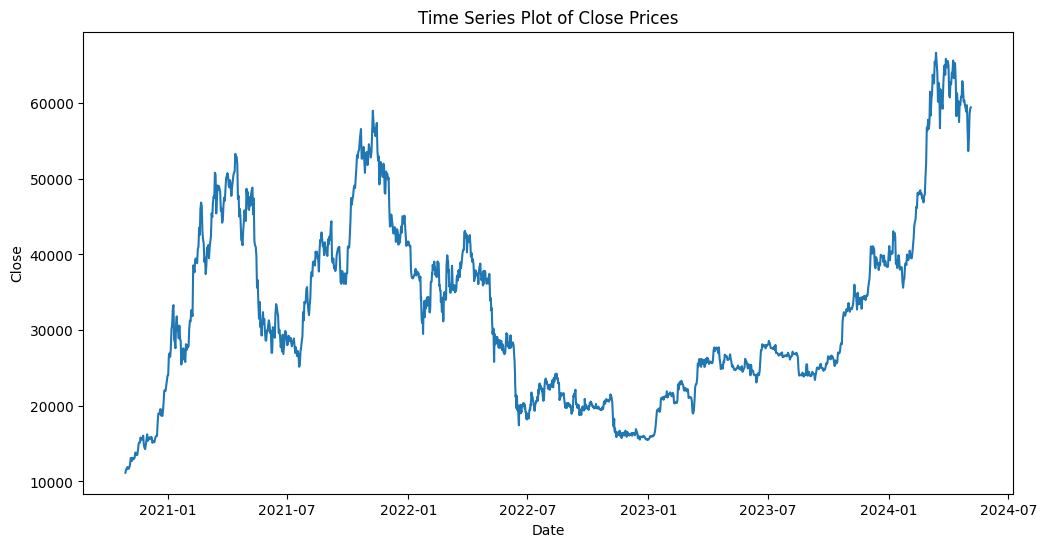

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

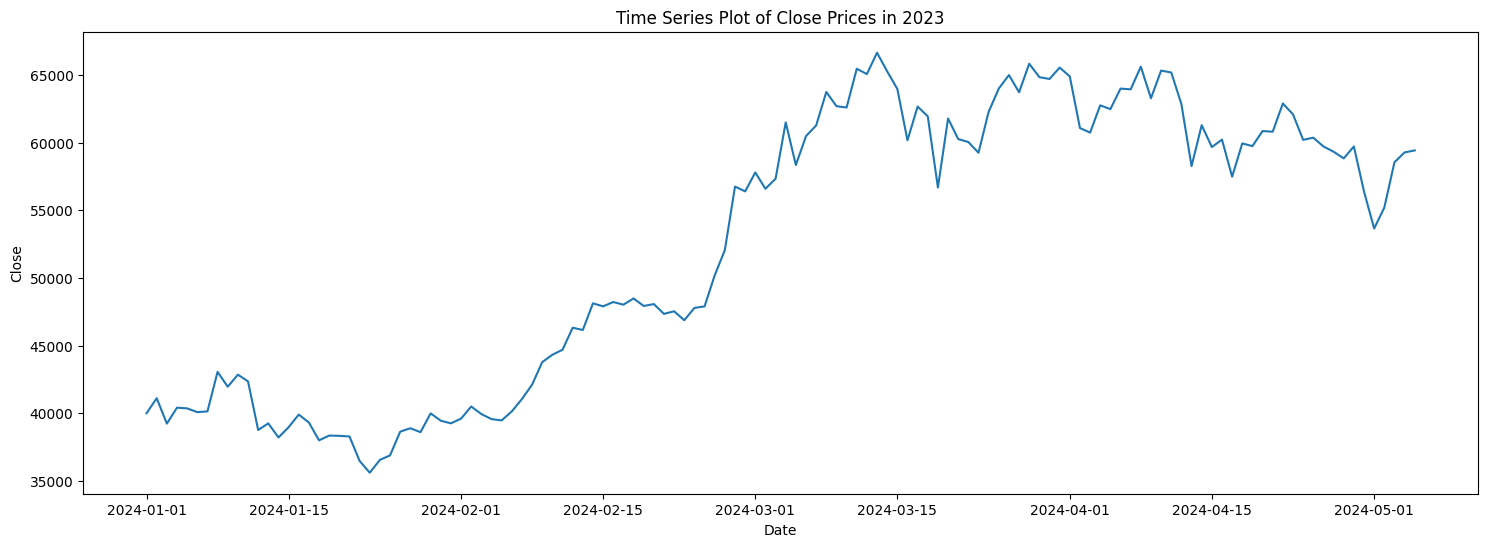

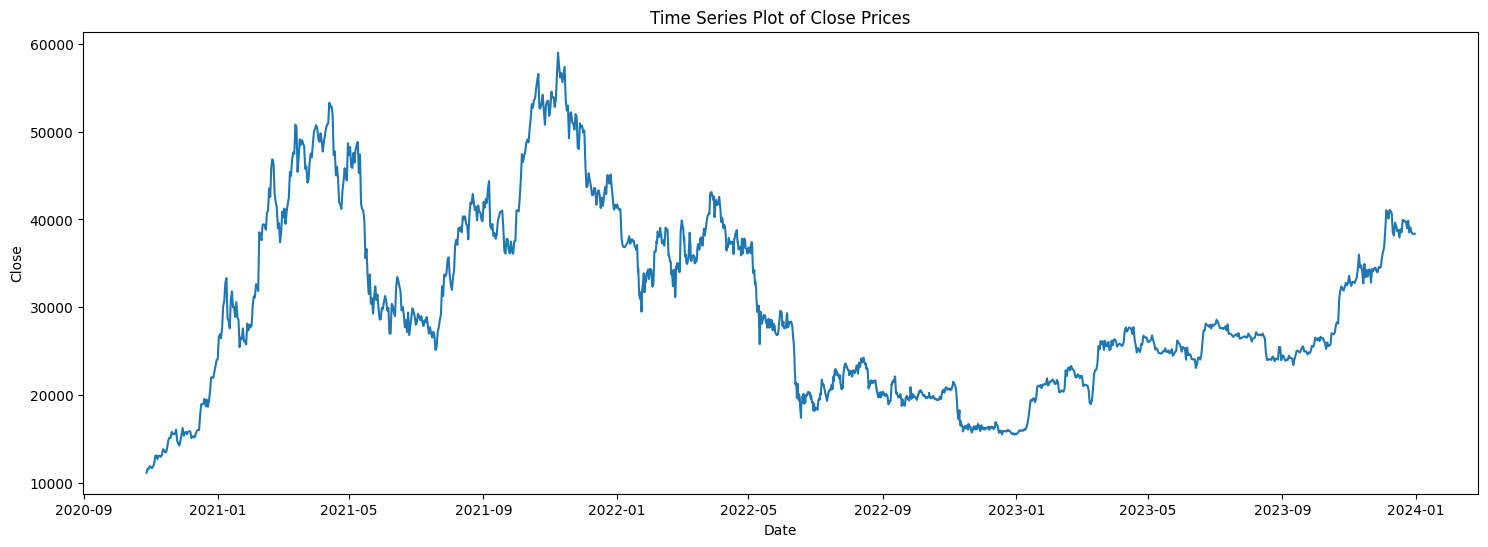

In [6]:
test_set = df[df['date'].dt.year == 2024]

# Training set
train_set = df[df['date'].dt.year != 2024]
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_set['date'], test_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices in 2023')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(train_set['date'], train_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

In [7]:
valid = np.array(test_set['close'])
train = np.array(train_set['close'])

valid = valid[::-1]
train = train[::-1]

In [8]:
def plot_time_series(data):
    indices = np.arange(len(data))
    
    plt.figure(figsize=(10, 6))
    plt.plot(indices, data, label='Time Series Data')
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


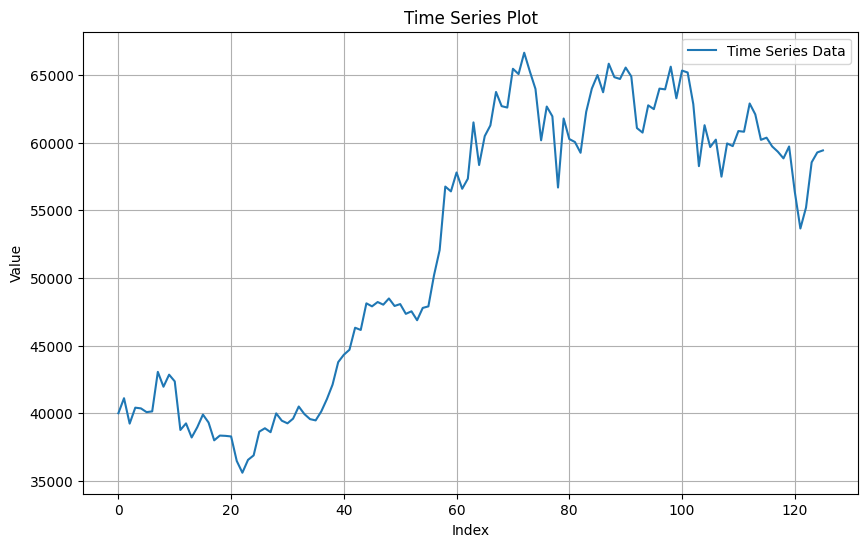

In [9]:
plot_time_series (valid)

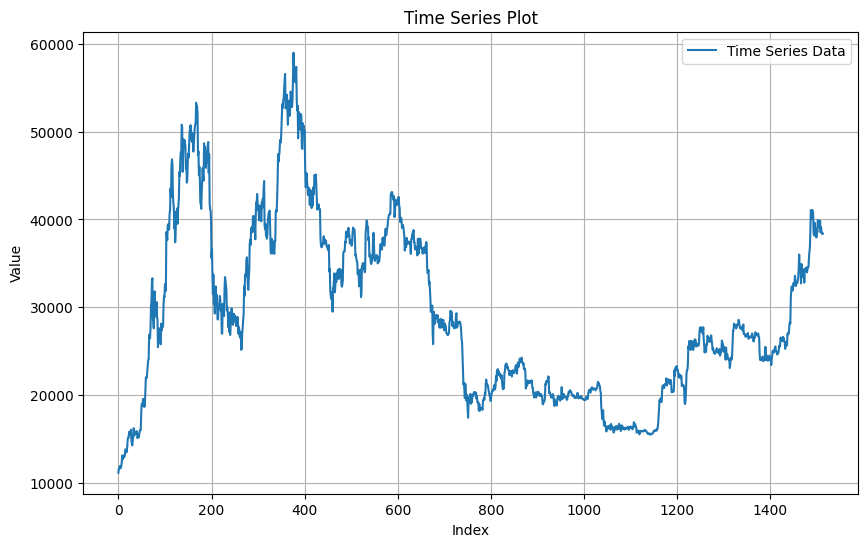

In [10]:
plot_time_series (train)

In [11]:
def normalize_data(train_data, valid_data, lower_percent, upper_percent):
    """
    Normalize training and validation data to a custom range where a certain percentage is mapped to values less than zero.
    
    Parameters:
    train_data (array-like): The training data to be normalized.
    valid_data (array-like): The validation data to be normalized.
    lower_percent (float): The percentage of the range to map to values less than zero.
    upper_percent (float): The percentage of the range to map to values greater than zero.
    
    Returns:
    tuple: A tuple containing the normalized training and validation data.
    """
    min_val = min(train_data)
    max_val = max(train_data)
    range_of_values = np.ptp(train_data) 
    min_val = min_val - range_of_values*5
    max_val = max_val + range_of_values*5
    normalized_train_data = [(x - min_val) / (max_val - min_val) for x in train_data]
    normalized_valid_data = [(x - min_val) / (max_val - min_val) for x in valid_data]
    return normalized_train_data, normalized_valid_data

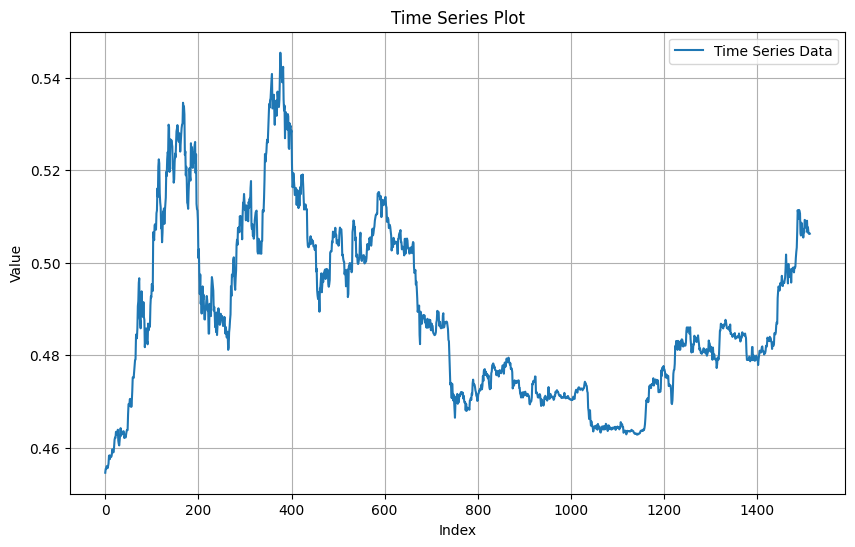

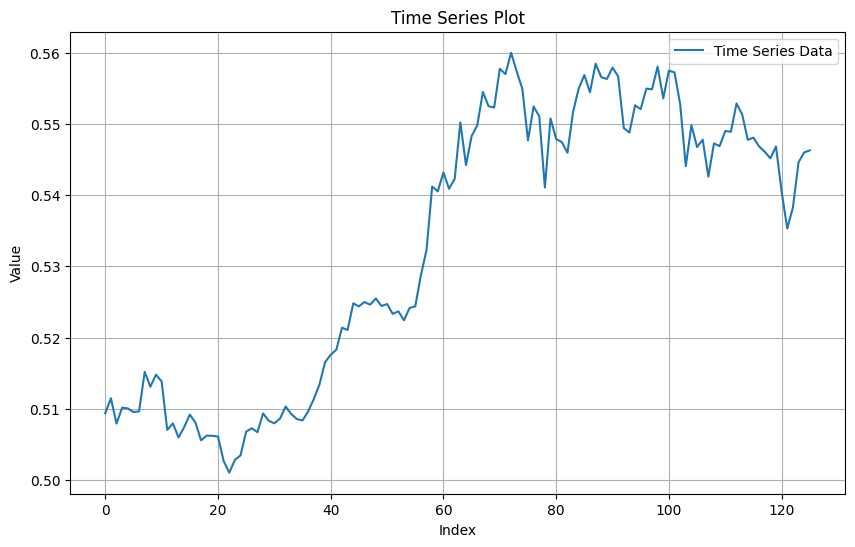

In [12]:
lower_percent = 5
upper_percent = 5

x_train_reshaped = train.reshape(-1, 1)
x_valid_reshaped = valid.reshape(-1, 1)

x_train_reshaped, x_valid_reshaped = normalize_data(x_train_reshaped, x_valid_reshaped, lower_percent , upper_percent)

plot_time_series(x_train_reshaped)
plot_time_series(x_valid_reshaped)

In [13]:
window_size = 30

x_train_window = []
y_train_window = []
x_valid_window = []
y_valid_window = []

x_train_reshaped = np.array(x_train_reshaped)
x_valid_reshaped = np.array(x_valid_reshaped)

for i in range(window_size, x_train_reshaped.shape[0] - 7):  # Adjusted to leave room for taking the mean of the next 7 days
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(np.mean(x_train_reshaped[i:i+7, 0]))  # Taking the mean of the next 7 days

for i in range(window_size, x_valid_reshaped.shape[0] - 7):  # Adjusted to leave room for taking the mean of the next 7 days
    x_valid_window.append(x_valid_reshaped[i-window_size:i, 0])
    y_valid_window.append(np.mean(x_valid_reshaped[i:i+7, 0]))  # Taking the mean of the next 7 days

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)


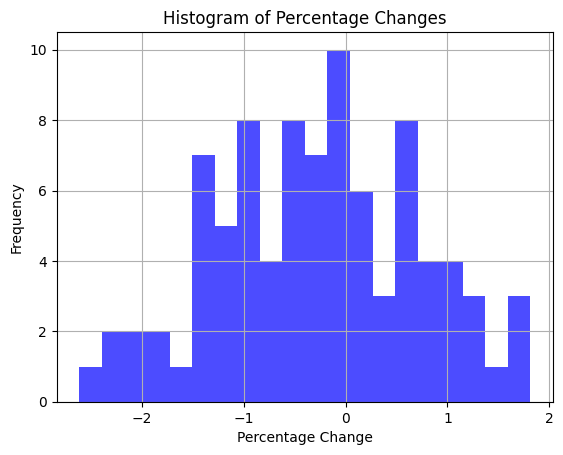

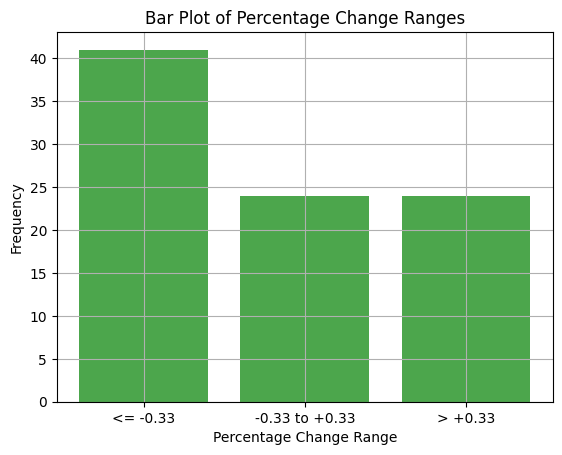

In [14]:
import matplotlib.pyplot as plt

# List to store percentage changes
percentage_changes = []

# Calculate percentage changes and store them
for i in range(len(y_valid)):
    x_element = X_valid[i][29]  # Accessing the 30th element of each row
    y_element = y_valid[i]
    
    percentage_change = ((x_element - y_element) / y_element) * 100
    percentage_changes.append(percentage_change)

# Plot histogram
plt.hist(percentage_changes, bins=20, color='blue', alpha=0.7)
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Changes')
plt.grid(True)
plt.show()

import numpy as np

# Define the ranges for the bars
ranges = [float('-inf'), -0.33, 0.33, float('inf')]

# Initialize counts for each range
counts = [0] * (len(ranges) - 1)

# Count the occurrences of percentage changes in each range
for change in percentage_changes:
    for i in range(len(ranges) - 1):
        if ranges[i] <= change < ranges[i + 1]:
            counts[i] += 1
            break

# Plot the bar chart
plt.bar(['<= -0.33', '-0.33 to +0.33', '> +0.33'], counts, color='green', alpha=0.7)
plt.xlabel('Percentage Change Range')
plt.ylabel('Frequency')
plt.title('Bar Plot of Percentage Change Ranges')
plt.grid(True)
plt.show()

In [15]:
# Calculate percentage changes and update y_train
for i in range(len(y_train)):
    y_train[i] = ((X_train[i][29] - y_train[i]) / y_train[i]) * 100

# Calculate percentage changes and update y_valid
for i in range(len(y_valid)):
    y_valid[i] = ((X_valid[i][29] - y_valid[i]) / y_valid[i]) * 100

# Define the ranges for the classes
class_ranges = [float('-inf'), -0.33, 0.33, float('inf')]

# Update y_train with class labels
for i in range(len(y_train)):
    percentage_change = y_train[i]
    for j in range(len(class_ranges) - 1):
        if class_ranges[j] <= percentage_change < class_ranges[j + 1]:
            y_train[i] = j
            break

# Update y_valid with class labels
for i in range(len(y_valid)):
    percentage_change = y_valid[i]
    for j in range(len(class_ranges) - 1):
        if class_ranges[j] <= percentage_change < class_ranges[j + 1]:
            y_valid[i] = j
            break
            
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)

print (type(y_train[0]))
print (type(y_valid[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [16]:
from keras.utils import to_categorical

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

num_classes = 3
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)

2024-05-06 13:31:16.107058: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:31:16.112703: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-06 13:31:16.176465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:31:18.094180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(1477, 30)
(1477,)
(89, 30)
(89,)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.metrics import CategoricalAccuracy
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import itertools
import os
import pandas as pd
from tqdm import tqdm

epochs = 1000


print(f"Training Neural Network")
# Initialising the LSTM model
classifier = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units=16, input_shape=(X_train.shape[1], 1), activation='tanh', return_sequences=True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units=32, input_shape=(X_train.shape[1], 1), activation='tanh', return_sequences=True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), activation='tanh'))
classifier.add(Dropout(0.2))


classifier.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model with Adam optimizer and specific learning rate
optimizer = Adam()
classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(f'best_model_LSTM_4.keras', monitor='val_accuracy', mode='max', save_best_only=True)

    # Fitting the LSTM model to the Training set with the ModelCheckpoint callback
progress_bar = tqdm(total=epochs, desc=f"Progress:", position=0, leave=True)
for epoch in range(epochs):
    history = classifier.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
    progress_bar.update(1)  # Update the progress bar
    progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0], accuracy=history.history['accuracy'][0], val_accuracy=history.history['val_accuracy'][0])
progress_bar.close()




2024-05-06 13:31:19.862352: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 13:31:19.863393: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/p/pakrit/pytorchRL/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Training Neural Network


Progress:: 100%|██████████| 1000/1000 [12:19<00:00,  1.35it/s, accuracy=0.647, loss=0.814, val_accuracy=0.393, val_loss=1.11]


In [18]:
print(f"Training Neural Network")
# Initialising the LSTM model
classifier = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
classifier.add(Dropout(0.2))



classifier.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), activation='relu'))
classifier.add(Dropout(0.2))


classifier.add(Dense(units=num_classes, activation='softmax'))

    # Compile the model with Adam optimizer and specific learning rate
optimizer = Adam()
classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint(f'best_model_LSTM_5.keras', monitor='val_accuracy', mode='max', save_best_only=True)

    # Fitting the LSTM model to the Training set with the ModelCheckpoint callback
progress_bar = tqdm(total=epochs, desc=f"Progress:", position=0, leave=True)
for epoch in range(epochs):
    history = classifier.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
    progress_bar.update(1)  # Update the progress bar
    progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0], accuracy=history.history['accuracy'][0], val_accuracy=history.history['val_accuracy'][0])
progress_bar.close()


Training Neural Network


Progress:: 100%|██████████| 1000/1000 [11:15<00:00,  1.48it/s, accuracy=0.607, loss=0.879, val_accuracy=0.393, val_loss=1.12]
